# AI-WALLET

In [1733]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, WeekdayLocator, DayLocator, MONDAY
from mplfinance.original_flavor import candlestick_ohlc

In [1734]:
df = pd.read_csv("records.csv")

In [1735]:
df.head()

,DATE,DESCRIPTION,ACCOUNT,CREDIT,DEBIT,BALANCE,CATEGORY,SUB_CATEGORY
0,01/05/2024,GOOGLE INDIA SERVICE,SOUTH,NaN,320.9,418.27,COMMUNICATION,ALL
1,01/05/2024,HAIRUNNISA M K,SOUTH,NaN,90,328.27,DINING,ALL
2,02/05/2024,ARUN ARAVIND,SOUTH,NaN,77,251.27,DINING,ALL
3,02/05/2024,SUMESH SUGATHAN,SOUTH,NaN,6,245.27,DINING,ALL
4,02/05/2024,ZERODHA BROKING LIMITED,SOUTH,"11,000.00",NaN,"11,245.27",INVESTMENT,ALL


# Missing Value Mangement

In [1736]:
df.columns.values

array(['DATE', 'DESCRIPTION', 'ACCOUNT', 'CREDIT', 'DEBIT', 'BALANCE',
       'CATEGORY', 'SUB_CATEGORY'], dtype=object)

In [1737]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   DATE          241 non-null    object
 1   DESCRIPTION   239 non-null    object
 2   ACCOUNT       241 non-null    object
 3   CREDIT        112 non-null    object
 4   DEBIT         131 non-null    object
 5   BALANCE       241 non-null    object
 6   CATEGORY      241 non-null    object
 7   SUB_CATEGORY  241 non-null    object
dtypes: object(8)
memory usage: 15.2+ KB


In [1738]:
# Find null values
df.isnull().sum()

DATE              0
DESCRIPTION       2
ACCOUNT           0
CREDIT          129
DEBIT           110
BALANCE           0
CATEGORY          0
SUB_CATEGORY      0
dtype: int64

In [1739]:
# Replace null values
df['DESCRIPTION'] = df['DESCRIPTION'].fillna('UNKNOWN')
df['CATEGORY'] = df['CATEGORY'].fillna('OTHERS')
df['SUB_CATEGORY'] = df['SUB_CATEGORY'].fillna('ALL')

In [1740]:
df.isnull().sum()

DATE              0
DESCRIPTION       0
ACCOUNT           0
CREDIT          129
DEBIT           110
BALANCE           0
CATEGORY          0
SUB_CATEGORY      0
dtype: int64

In [1741]:
# check and change categories
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   DATE          241 non-null    object
 1   DESCRIPTION   241 non-null    object
 2   ACCOUNT       241 non-null    object
 3   CREDIT        112 non-null    object
 4   DEBIT         131 non-null    object
 5   BALANCE       241 non-null    object
 6   CATEGORY      241 non-null    object
 7   SUB_CATEGORY  241 non-null    object
dtypes: object(8)
memory usage: 15.2+ KB


In [1742]:
# Convert 'DATE' column to datetime format
df['DATE'] = pd.to_datetime(df['DATE'], format='%d/%m/%Y')

In [1743]:
# Step 4: Convert numerical columns to float
df['CREDIT'] = df['CREDIT'].str.replace(",", "").astype(float)
df['DEBIT'] = df['DEBIT'].str.replace(",", "").astype(float)
df['BALANCE'] = df['BALANCE'].str.replace(",", "").astype(float)

In [1744]:
df.head()

,DATE,DESCRIPTION,ACCOUNT,CREDIT,DEBIT,BALANCE,CATEGORY,SUB_CATEGORY
0,2024-05-01,GOOGLE INDIA SERVICE,SOUTH,NaN,320.9,418.27,COMMUNICATION,ALL
1,2024-05-01,HAIRUNNISA M K,SOUTH,NaN,90.0,328.27,DINING,ALL
2,2024-05-02,ARUN ARAVIND,SOUTH,NaN,77.0,251.27,DINING,ALL
3,2024-05-02,SUMESH SUGATHAN,SOUTH,NaN,6.0,245.27,DINING,ALL
4,2024-05-02,ZERODHA BROKING LIMITED,SOUTH,11000.0,NaN,11245.27,INVESTMENT,ALL


In [1745]:
df['CREDIT']  = df['CREDIT'].fillna(0)
df['DEBIT'] = df['DEBIT'].fillna(0)

In [1746]:
df.head()

,DATE,DESCRIPTION,ACCOUNT,CREDIT,DEBIT,BALANCE,CATEGORY,SUB_CATEGORY
0,2024-05-01,GOOGLE INDIA SERVICE,SOUTH,0.0,320.9,418.27,COMMUNICATION,ALL
1,2024-05-01,HAIRUNNISA M K,SOUTH,0.0,90.0,328.27,DINING,ALL
2,2024-05-02,ARUN ARAVIND,SOUTH,0.0,77.0,251.27,DINING,ALL
3,2024-05-02,SUMESH SUGATHAN,SOUTH,0.0,6.0,245.27,DINING,ALL
4,2024-05-02,ZERODHA BROKING LIMITED,SOUTH,11000.0,0.0,11245.27,INVESTMENT,ALL


In [1747]:
df["CATEGORY"].value_counts()

CATEGORY
BUSINESS         95
DINING           35
TRANSFERS        20
SHOPPING         17
COMMUNICATION     8
TRAVEL            8
FINE/TAX          8
LOAN              7
GROCERY           6
SUBSCRIPTIONS     6
SERVICES          5
FAMILY            5
RENT              4
HOUSEHOLDS        4
EVENTS            3
FOOD              2
SALARY            2
INVESTMENT        2
PERSONAL CARE     1
GROCERIES         1
WORK              1
OTHERS            1
Name: count, dtype: int64

In [1748]:
df["CATEGORY"] = df["CATEGORY"].replace("PERSONAL CARE", "PERSONAL_CARE")

In [1749]:
df.CATEGORY.value_counts()

CATEGORY
BUSINESS         95
DINING           35
TRANSFERS        20
SHOPPING         17
COMMUNICATION     8
TRAVEL            8
FINE/TAX          8
LOAN              7
GROCERY           6
SUBSCRIPTIONS     6
SERVICES          5
FAMILY            5
RENT              4
HOUSEHOLDS        4
EVENTS            3
FOOD              2
SALARY            2
INVESTMENT        2
PERSONAL_CARE     1
GROCERIES         1
WORK              1
OTHERS            1
Name: count, dtype: int64

In [1750]:
df.head(10)

,DATE,DESCRIPTION,ACCOUNT,CREDIT,DEBIT,BALANCE,CATEGORY,SUB_CATEGORY
0,2024-05-01,GOOGLE INDIA SERVICE,SOUTH,0.0,320.90,418.27,COMMUNICATION,ALL
1,2024-05-01,HAIRUNNISA M K,SOUTH,0.0,90.00,328.27,DINING,ALL
2,2024-05-02,ARUN ARAVIND,SOUTH,0.0,77.00,251.27,DINING,ALL
3,2024-05-02,SUMESH SUGATHAN,SOUTH,0.0,6.00,245.27,DINING,ALL
4,2024-05-02,ZERODHA BROKING LIMITED,SOUTH,11000.0,0.00,11245.27,INVESTMENT,ALL
5,2024-05-02,QUADRILLION FINANCE PRIVATE,SOUTH,0.0,1050.00,10195.27,LOAN,ALL
6,2024-05-02,PREETHIMOL MP,SOUTH,0.0,50.00,10145.27,TRANSFERS,ALL
7,2024-05-02,GARAGEPRENEURS INTERNET PVT,SOUTH,0.0,5955.31,4189.96,LOAN,ALL
8,2024-05-02,VIBEESH B S,SOUTH,0.0,800.00,3389.96,EVENTS,ALL
9,2024-05-03,XAVIERMATHEW7@OKAXIS,SOUTH,0.0,15.00,3374.96,SHOPPING,ALL


# Record Checking

In [1751]:
df_south = df[df['ACCOUNT'] == 'SOUTH'].reset_index(drop=True)
df_sbi = df[df['ACCOUNT'] == 'SBI'].reset_index(drop=True)

In [1752]:
df_south.head()

,DATE,DESCRIPTION,ACCOUNT,CREDIT,DEBIT,BALANCE,CATEGORY,SUB_CATEGORY
0,2024-05-01,GOOGLE INDIA SERVICE,SOUTH,0.0,320.9,418.27,COMMUNICATION,ALL
1,2024-05-01,HAIRUNNISA M K,SOUTH,0.0,90.0,328.27,DINING,ALL
2,2024-05-02,ARUN ARAVIND,SOUTH,0.0,77.0,251.27,DINING,ALL
3,2024-05-02,SUMESH SUGATHAN,SOUTH,0.0,6.0,245.27,DINING,ALL
4,2024-05-02,ZERODHA BROKING LIMITED,SOUTH,11000.0,0.0,11245.27,INVESTMENT,ALL


In [1753]:
df_sbi.head()

,DATE,DESCRIPTION,ACCOUNT,CREDIT,DEBIT,BALANCE,CATEGORY,SUB_CATEGORY
0,2024-05-01,INSUFFICIENT BAL POS DECLINE CHARGE,SBI,0.0,23.6,56.76,FINE/TAX,ALL
1,2024-05-01,SEETHAL,SBI,2000.0,0.0,2056.76,TRANSFERS,ALL
2,2024-05-02,INSUFFICIENT BAL POS DECLINE CHARGE,SBI,0.0,23.6,2033.16,FINE/TAX,ALL
3,2024-05-02,VINSHA P,SBI,0.0,2000.0,33.16,TRANSFERS,ALL
4,2024-05-02,PREETHIM,SBI,300.0,0.0,333.16,TRANSFERS,ALL


In [1754]:
df_south['BALANCE_SOUTH'] = 0.0

df_south.at[0, "BALANCE_SOUTH"] = df_south.at[0, "BALANCE"]

for i in range(1, len(df_south)):
    df_south.at[i, "BALANCE_SOUTH"] = df_south.at[i-1, "BALANCE_SOUTH"] + df_south.at[i, "CREDIT"] - df_south.at[i, "DEBIT"]
    df_south.at[i, "BALANCE_SOUTH"] = df_south.at[i, "BALANCE_SOUTH"].round(2)
    if df_south.at[i, "BALANCE_SOUTH"] != df_south.at[i, "BALANCE"]:
        raise ValueError(f"Wrong transaction entry error at index {i}")
    

In [1755]:
df_south.head()

,DATE,DESCRIPTION,ACCOUNT,CREDIT,DEBIT,BALANCE,CATEGORY,SUB_CATEGORY,BALANCE_SOUTH
0,2024-05-01,GOOGLE INDIA SERVICE,SOUTH,0.0,320.9,418.27,COMMUNICATION,ALL,418.27
1,2024-05-01,HAIRUNNISA M K,SOUTH,0.0,90.0,328.27,DINING,ALL,328.27
2,2024-05-02,ARUN ARAVIND,SOUTH,0.0,77.0,251.27,DINING,ALL,251.27
3,2024-05-02,SUMESH SUGATHAN,SOUTH,0.0,6.0,245.27,DINING,ALL,245.27
4,2024-05-02,ZERODHA BROKING LIMITED,SOUTH,11000.0,0.0,11245.27,INVESTMENT,ALL,11245.27


In [1756]:
df_south.to_csv("records_south.csv", index=False)

In [1757]:
df_sbi['BALANCE_SBI'] = 0.0

df_sbi.at[0, "BALANCE_SBI"] = df_sbi.at[0, "BALANCE"]

for i in range(1, len(df_sbi)):
    df_sbi.at[i, "BALANCE_SBI"] = df_sbi.at[i-1, "BALANCE_SBI"] + df_sbi.at[i, "CREDIT"] - df_sbi.at[i, "DEBIT"]
    df_sbi.at[i, "BALANCE_SBI"] = df_sbi.at[i, "BALANCE_SBI"].round(2)
    if df_sbi.at[i, "BALANCE_SBI"] != df_sbi.at[i, "BALANCE"]:
        raise ValueError(f"Wrong transaction entry error at index {i}")

In [1758]:
df_sbi.head()

,DATE,DESCRIPTION,ACCOUNT,CREDIT,DEBIT,BALANCE,CATEGORY,SUB_CATEGORY,BALANCE_SBI
0,2024-05-01,INSUFFICIENT BAL POS DECLINE CHARGE,SBI,0.0,23.6,56.76,FINE/TAX,ALL,56.76
1,2024-05-01,SEETHAL,SBI,2000.0,0.0,2056.76,TRANSFERS,ALL,2056.76
2,2024-05-02,INSUFFICIENT BAL POS DECLINE CHARGE,SBI,0.0,23.6,2033.16,FINE/TAX,ALL,2033.16
3,2024-05-02,VINSHA P,SBI,0.0,2000.0,33.16,TRANSFERS,ALL,33.16
4,2024-05-02,PREETHIM,SBI,300.0,0.0,333.16,TRANSFERS,ALL,333.16


In [1759]:
df_sbi.to_csv("records_sbi.csv", index=False)

Check the records and make essential changes if requried.

# Feature Engineering

In [1760]:
df_south = pd.read_csv("records_south_mod.csv")
df_sbi = pd.read_csv("records_sbi_mod.csv")

In [1761]:
df = pd.concat([df_south, df_sbi])

In [1762]:
df = df.rename_axis("trans_order").sort_values([ 'DATE', 'trans_order'], ignore_index=True)

In [1763]:
df.head(20)

,DATE,DESCRIPTION,ACCOUNT,CREDIT,DEBIT,BALANCE,CATEGORY,SUB_CATEGORY,BALANCE_SOUTH,BALANCE_SBI
0,2024-05-01,GOOGLE INDIA SERVICE,SOUTH,0.0,320.90,418.27,COMMUNICATION,ALL,418.27,NaN
1,2024-05-01,INSUFFICIENT BAL POS DECLINE CHARGE,SBI,0.0,23.60,56.76,FINE/TAX,ALL,NaN,56.76
2,2024-05-01,HAIRUNNISA M K,SOUTH,0.0,90.00,328.27,DINING,ALL,328.27,NaN
3,2024-05-01,SEETHAL,SBI,2000.0,0.00,2056.76,TRANSFERS,ALL,NaN,2056.76
4,2024-05-02,ARUN ARAVIND,SOUTH,0.0,77.00,251.27,DINING,ALL,251.27,NaN
5,2024-05-02,INSUFFICIENT BAL POS DECLINE CHARGE,SBI,0.0,23.60,2033.16,FINE/TAX,ALL,NaN,2033.16
6,2024-05-02,SUMESH SUGATHAN,SOUTH,0.0,6.00,245.27,DINING,ALL,245.27,NaN
7,2024-05-02,VINSHA P,SBI,0.0,2000.00,33.16,TRANSFERS,ALL,NaN,33.16
8,2024-05-02,ZERODHA BROKING LIMITED,SOUTH,11000.0,0.00,11245.27,INVESTMENT,ALL,11245.27,NaN
9,2024-05-02,PREETHIM,SBI,300.0,0.00,333.16,TRANSFERS,ALL,NaN,333.16


In [1764]:
# Create new balance features
df['BALANCE_CASH'] = 0.0
df['BALANCE_TOTAL'] = 0.0

In [1765]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DATE           241 non-null    object 
 1   DESCRIPTION    241 non-null    object 
 2   ACCOUNT        241 non-null    object 
 3   CREDIT         241 non-null    float64
 4   DEBIT          241 non-null    float64
 5   BALANCE        241 non-null    float64
 6   CATEGORY       241 non-null    object 
 7   SUB_CATEGORY   241 non-null    object 
 8   BALANCE_SOUTH  116 non-null    float64
 9   BALANCE_SBI    125 non-null    float64
 10  BALANCE_CASH   241 non-null    float64
 11  BALANCE_TOTAL  241 non-null    float64
dtypes: float64(7), object(5)
memory usage: 22.7+ KB


In [1766]:

# cash_initial_balance = 0

# new_row = {
#     'DATE': [np.nan],
#     'DESCRIPTION': [np.nan],
#     'ACCOUNT': [np.nan],
#     'CREDIT': [np.nan],
#     'DEBIT': [np.nan],
#     'BALANCE': [np.nan],
#     'CATEGORY': [np.nan],
#     'SUB_CATEGORY': [np.nan],
#     'BALANCE_CASH' : [cash_initial_balance],
#     'BALANCE_SOUTH' : [df_south.at[0, "BALANCE_SOUTH"] - df_south.at[0, "CREDIT"] + df_south.at[0, "DEBIT"]],
#     'BALANCE_SBI' : [df_sbi.at[0, "BALANCE_SBI"] - df_sbi.at[0, "CREDIT"] + df_sbi.at[0, "DEBIT"]],
#     'BALANCE_TOTAL' : [0]
# }


# df_init = pd.DataFrame(data = new_row)
# df = pd.concat([df_init, df], ignore_index=True)

In [1767]:
if df.at[0, 'ACCOUNT'] == "SBI":
    df.at[0, 'BALANCE_SOUTH'] = df_south.at[0, "BALANCE_SOUTH"] - df_south.at[0, "CREDIT"] + df_south.at[0, "DEBIT"]

if df.at[0, 'ACCOUNT'] == "SOUTH":
    df.at[0, 'BALANCE_SBI'] = df_sbi.at[0, "BALANCE_SBI"] - df_sbi.at[0, "CREDIT"] + df_sbi.at[0, "DEBIT"]

In [1768]:
df.head(10)

,DATE,DESCRIPTION,ACCOUNT,CREDIT,DEBIT,BALANCE,CATEGORY,SUB_CATEGORY,BALANCE_SOUTH,BALANCE_SBI,BALANCE_CASH,BALANCE_TOTAL
0,2024-05-01,GOOGLE INDIA SERVICE,SOUTH,0.0,320.9,418.27,COMMUNICATION,ALL,418.27,80.36,0.0,0.0
1,2024-05-01,INSUFFICIENT BAL POS DECLINE CHARGE,SBI,0.0,23.6,56.76,FINE/TAX,ALL,NaN,56.76,0.0,0.0
2,2024-05-01,HAIRUNNISA M K,SOUTH,0.0,90.0,328.27,DINING,ALL,328.27,NaN,0.0,0.0
3,2024-05-01,SEETHAL,SBI,2000.0,0.0,2056.76,TRANSFERS,ALL,NaN,2056.76,0.0,0.0
4,2024-05-02,ARUN ARAVIND,SOUTH,0.0,77.0,251.27,DINING,ALL,251.27,NaN,0.0,0.0
5,2024-05-02,INSUFFICIENT BAL POS DECLINE CHARGE,SBI,0.0,23.6,2033.16,FINE/TAX,ALL,NaN,2033.16,0.0,0.0
6,2024-05-02,SUMESH SUGATHAN,SOUTH,0.0,6.0,245.27,DINING,ALL,245.27,NaN,0.0,0.0
7,2024-05-02,VINSHA P,SBI,0.0,2000.0,33.16,TRANSFERS,ALL,NaN,33.16,0.0,0.0
8,2024-05-02,ZERODHA BROKING LIMITED,SOUTH,11000.0,0.0,11245.27,INVESTMENT,ALL,11245.27,NaN,0.0,0.0
9,2024-05-02,PREETHIM,SBI,300.0,0.0,333.16,TRANSFERS,ALL,NaN,333.16,0.0,0.0


In [1769]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DATE           241 non-null    object 
 1   DESCRIPTION    241 non-null    object 
 2   ACCOUNT        241 non-null    object 
 3   CREDIT         241 non-null    float64
 4   DEBIT          241 non-null    float64
 5   BALANCE        241 non-null    float64
 6   CATEGORY       241 non-null    object 
 7   SUB_CATEGORY   241 non-null    object 
 8   BALANCE_SOUTH  116 non-null    float64
 9   BALANCE_SBI    126 non-null    float64
 10  BALANCE_CASH   241 non-null    float64
 11  BALANCE_TOTAL  241 non-null    float64
dtypes: float64(7), object(5)
memory usage: 22.7+ KB


In [1770]:
df[['BALANCE_SOUTH', 'BALANCE_SBI']] = df[['BALANCE_SOUTH', 'BALANCE_SBI']].ffill()
df['BALANCE_TOTAL'] = df['BALANCE_SOUTH'] + df['BALANCE_SBI'] + df['BALANCE_CASH']

In [1771]:
df.head(10)

,DATE,DESCRIPTION,ACCOUNT,CREDIT,DEBIT,BALANCE,CATEGORY,SUB_CATEGORY,BALANCE_SOUTH,BALANCE_SBI,BALANCE_CASH,BALANCE_TOTAL
0,2024-05-01,GOOGLE INDIA SERVICE,SOUTH,0.0,320.9,418.27,COMMUNICATION,ALL,418.27,80.36,0.0,498.63
1,2024-05-01,INSUFFICIENT BAL POS DECLINE CHARGE,SBI,0.0,23.6,56.76,FINE/TAX,ALL,418.27,56.76,0.0,475.03
2,2024-05-01,HAIRUNNISA M K,SOUTH,0.0,90.0,328.27,DINING,ALL,328.27,56.76,0.0,385.03
3,2024-05-01,SEETHAL,SBI,2000.0,0.0,2056.76,TRANSFERS,ALL,328.27,2056.76,0.0,2385.03
4,2024-05-02,ARUN ARAVIND,SOUTH,0.0,77.0,251.27,DINING,ALL,251.27,2056.76,0.0,2308.03
5,2024-05-02,INSUFFICIENT BAL POS DECLINE CHARGE,SBI,0.0,23.6,2033.16,FINE/TAX,ALL,251.27,2033.16,0.0,2284.43
6,2024-05-02,SUMESH SUGATHAN,SOUTH,0.0,6.0,245.27,DINING,ALL,245.27,2033.16,0.0,2278.43
7,2024-05-02,VINSHA P,SBI,0.0,2000.0,33.16,TRANSFERS,ALL,245.27,33.16,0.0,278.43
8,2024-05-02,ZERODHA BROKING LIMITED,SOUTH,11000.0,0.0,11245.27,INVESTMENT,ALL,11245.27,33.16,0.0,11278.43
9,2024-05-02,PREETHIM,SBI,300.0,0.0,333.16,TRANSFERS,ALL,11245.27,333.16,0.0,11578.43


In [1772]:
df.to_csv("records_modified.csv")

## Insights

In [1773]:
df.columns.values

array(['DATE', 'DESCRIPTION', 'ACCOUNT', 'CREDIT', 'DEBIT', 'BALANCE',
       'CATEGORY', 'SUB_CATEGORY', 'BALANCE_SOUTH', 'BALANCE_SBI',
       'BALANCE_CASH', 'BALANCE_TOTAL'], dtype=object)

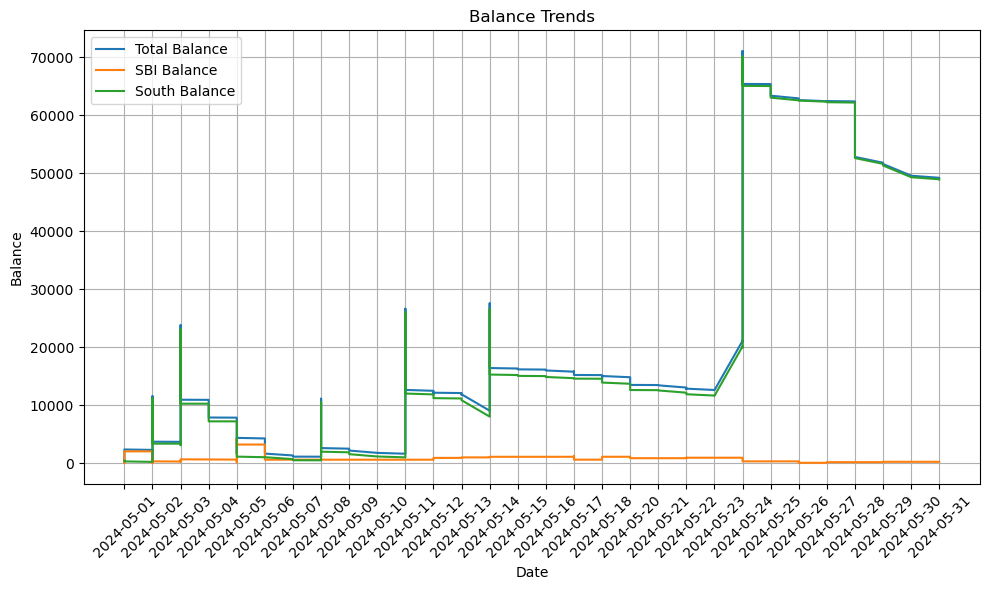

In [1774]:
# Plotting
plt.figure(figsize=(10, 6))

# Plot each balance as a separate line
plt.plot(df['DATE'], df['BALANCE_TOTAL'], label='Total Balance')
plt.plot(df['DATE'], df['BALANCE_SBI'], label='SBI Balance')
plt.plot(df['DATE'], df['BALANCE_SOUTH'], label='South Balance')

# Customize the plot
plt.title('Balance Trends')
plt.xlabel('Date')
plt.ylabel('Balance')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

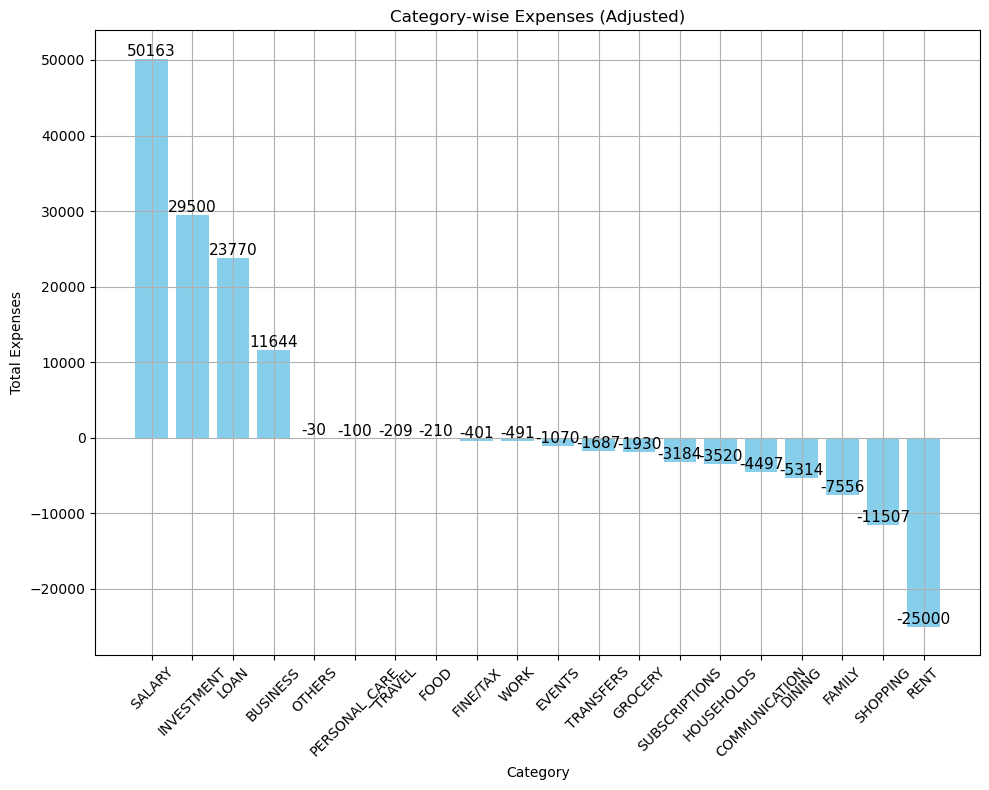

In [1775]:
# Adjusting expenses by subtracting credits from the same category
df['EXPENSE'] = df['CREDIT'] - df['DEBIT']

# Group by CATEGORY and sum the adjusted expenses (EXPENSE) for each category
category_expenses = df.groupby('CATEGORY')['EXPENSE'].sum().reset_index()

# Sort by expenses in descending order
category_expenses = category_expenses.sort_values(by='EXPENSE', ascending=False)

# Plotting the sorted bar diagram with annotations
plt.figure(figsize=(10, 8))
bars = plt.bar(category_expenses['CATEGORY'], category_expenses['EXPENSE'], color='skyblue')

# Adding annotations on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center', fontsize=11)

plt.xlabel('Category')
plt.ylabel('Total Expenses')
plt.title('Category-wise Expenses (Adjusted)')
plt.xticks(rotation=45)
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()